# Clustering

## Overview

- Clustering is a process of grouping similar objects together based on their characteristics or features. Data points are divided into groups based on their similarity or distance from each other. 

- The objective is to maximize the similarity between objects within each cluster and minimize the similarity between objects in different clusters. Within the context of our popular music analysis, each of our data points represents a country, and we are trying to group them based on the similarity of their currently trending music.

- We will be using __Agglomerative__ clustering to group similar countries together. This type of clustering starts off with each data point as a separate cluster and then iteratively merges the closest clusters until all data points are in a single cluster.

## Target Question

- Which countries have the most similar trending music taste?


## Data Features

### Categorical
- `country`
### Numerical
- `danceability` - How suitable a track is for dancing from 0.0 to 1.0 based on a combination of musical elements including tempo, rhythm stability, and overall regularity.
- `energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
- `loudness` - The overall loudness of a track in decibels (dB), ranging from -60.0 to 0.0
- `speechiness` - The presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value.
- `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `instrumentalness` - Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- `liveness` - Detects the presence of an audience in the recording, from 0.0 to 1.0
- `valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
- `tempo` - The overall estimated tempo of a track in beats per minute (BPM).


## Data preprocessing

In [1]:
import pandas as pd

num_names = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] # list of numerical names
cat_names = ['country'] # list of categorical names

df = pd.read_csv("../Data/merged_finaltop100_revised.csv") # read in data
df = df[num_names + cat_names] # select features of interest
df = df.dropna()

### Scaling
- We will need to scale the numerical features between (0,1)

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df[num_names] = scaler.fit_transform(df[num_names]) # scale numerical features (0,1)

### Dimensionality Reduction

- We have our input data $X \in R^9$, but only 73 countries.

- In such high dimensional data, 73 countries will be really sparse - so our clusters might not tell us much.

- We can reduce the dimensionality of the data through a **Principal Component Analysis** to get more meaningful clusters. 

- Here we use PCA to map $X \in R^9 \rightarrow R^2$


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 

# Transform the input data and (in the data frame) replace the original inputs w/ transformed inputs

X_pca = pca.fit_transform(df[num_names]) # Transform the input data and store result in `X_pca`
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2']) # Make a new data frame containing the Principal Components 
df = df['country'] # drop all numerical features
df = pd.concat([df, df_pca], axis=1) # add the principal components



### Aggregation

- We currently have the 100 songs per country. 

- In order to cluster by country, we will need to aggregate each country's top songs such that we have one entry per country.

- To do this, we will group the values by country and then compute the mean numerical values of each country's top 100 songs.

In [4]:
# Group the data by country and compute the mean of all numerical values. 
df = df.groupby('country').mean()

### Clustering

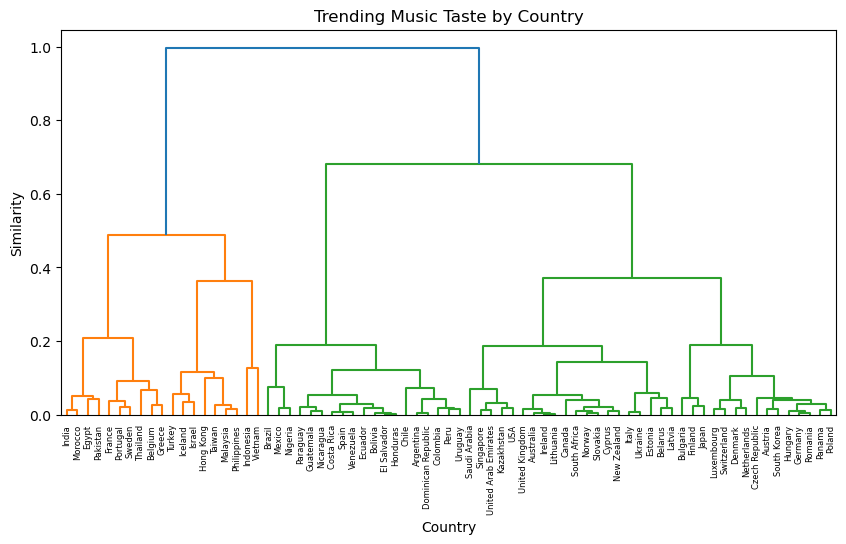

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# compute the hierarchical clustering
Z = sch.linkage(df, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.xlabel('Country')
plt.ylabel('Similarity')
plt.title('Trending Music Taste by Country')
plt.show()


## Observations

We see that there are a number of factors that contribute towards similarity of trending music:

- **Geographic Proximity** - Countries from the same geographic regions tend to cluster together.

- **Cultural Background** - Countries with similar cultural backgrounds share similar music tastes.

- **Language** - Language has a significant affect on music similarity that permeates beyond geographical and cultural factors.